<div>
Olá, Vitor!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>
<s>
    
Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
- Análises bem detalhadas em cada etapa do projeto
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. Peço que trabalhe nesses pontos para avançarmos.
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**
</s>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor v2</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

<div style="background-color: lightblue; color: black; padding: 10px;">
 
Neste projeto iremos verificar qual dos 2 planos da empresa geram mais receita à empresa para dar um direcionamento e foco maior na publicidade através de testes de hipóteses com níveis de confiança maiores que 95%.    
    
</div>

 

## Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns


## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames
call = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
msg = pd.read_csv('/datasets/megaline_messages.csv')
plan = pd.read_csv('/datasets/megaline_plans.csv')
user =pd.read_csv('/datasets/megaline_users.csv')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Os conjuntos de dados foram carregados corretamente
- O import das bibliotecas foi feito de forma correta e em uma célula separada.
</div>

## Prepare os dados

In [3]:
print(call.duplicated().sum())
print('\n')
print(internet.duplicated().sum())
print('\n')
print(plan.duplicated().sum())
print('\n')
print(msg.duplicated().sum())
print('\n')
print(user.duplicated().sum())

0


0


0


0


0


## Planos

In [4]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
print('DATAFRAM PLAN', plan.info())
print('\n')
print(plan.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
DATAFRAM PLAN None


        messages_included  mb_per_month_included  minutes_included  \
count            2.000000               2.000000          2.000000   
unique                NaN                    NaN               NaN   
top                   NaN                    NaN               NaN   
freq        

In [5]:
# Imprima uma amostra de dados dos planos
plan.head()



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div style="background-color: lightblue; color: black; padding: 10px;">
    

    
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Os métodos `info()` e `head()` foram utilizados para estudo inicial do conjunto de dados
</div>

## Corrija os dados

In [6]:
plan.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)
plan['gb_per_month_included'] = plan['gb_per_month_included'] / 1024
    

plan

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>- Aqui o ideal é transformar para `gb` usando a fórmula, evitando preenchimento manual de valores.</s>
</div>

## Enriqueça os dados

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>- Aqui você precisa justificar, mesmo não fazendo transformação dos dados.</s>
</div>

<div class="alert alert-block alert-info">
a tabela é muito sucinta, a princípio ela parece ter tudo que preciso, caso eu precise de alguma informaçao extra mais a frente eu farei mudanças
</div>

## Usuários

In [7]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários
print('DATAFRAME USER', user.info())
print('\n')
print(user.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
DATAFRAME USER None


            user_id first_name  last_name         age  \
count    500.000000        500        500  500.000000   
unique          NaN        458        399         NaN   
top             NaN    Seymour  Wilkinson         NaN   
freq            NaN          3          3         NaN   
mean    1249.500000        NaN        NaN   45.486000   
std      144.481833        NaN        NaN   16.972269   
min     1000.000000     

In [8]:
duplicated_rows = user[user[['first_name' ,'last_name']].duplicated(keep=False)] 
duplicated_rows.value_counts().sum()    #nenhuma linha duplicada

0

In [9]:
user['user_id'].duplicated().value_counts() #nenhum id duplicado

False    500
Name: user_id, dtype: int64

In [10]:
# Imprima uma amostra de dados dos usuários
user.head()

# temos dados ausentes para serem corrigidos mas nenhum dado duplicado

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### Corrija os dados

In [11]:
user['user_id']= user['user_id'].astype('category')

user['reg_date'] = pd.to_datetime(user['reg_date'])

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
    
- Aqui não podemos preencher os valores nulos do atributo `churn_date` com um valor inteiro, pois o tipo de dados original é uma data. Recomendo deixar esse atributo nesse formato e criar uma outra coluna com base nessa informação. Por exemplo, se o usuário já cancelou, o valor do atributo é `True` ou `False`, caso contrário.
</s>
</div>

<div class="alert alert-block alert-info">
Nesse caso como eu ainda não sei se vou usar essa coluna mais a frente então seria uma boa ideia nem criar outra pra otimizar o tempo certo? apenas deixar ela nao preenchida mesmo
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

Correto!
</div>

### Enriqueça os dados

In [12]:
user['year_month'] = user['reg_date'].dt.to_period('M')
user['estado'] = user['city'].str.split(',').str[1]
user['estado'] = user['estado'].str.strip()

In [13]:
user['plan'].value_counts()      #numero de usuarios em cada plano

surf        339
ultimate    161
Name: plan, dtype: int64

In [14]:
x = user.groupby(['year_month', 'plan'])['user_id'].size().reset_index(name='count')  #usuarios registrados mes
print('NOVOS USUARIOS POR PLANO POR MES')
x.reset_index(drop = True)
x.head()

NOVOS USUARIOS POR PLANO POR MES


,year_month,plan,count
0,2018-01,surf,30
1,2018-01,ultimate,19
2,2018-02,surf,30
3,2018-02,ultimate,12
4,2018-03,surf,30


In [15]:
user.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year_month,estado
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,2018-12,GA MSA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018-08,WA MSA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,2018-10,NV MSA
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,2018-01,OK MSA
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,2018-05,WA MSA


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Aqui você precisa enriquecer os dados disponibilizados, criando novos atributos a partir dos mesmos. Por exemplo, você poderia criar atributos temporais (semana, dia da semana, etc) a partir do atributo `reg_date`.</s>
</div>

<div class="alert alert-block alert-info">    
<b>    
    Esse codigo de criaçao de 'year_month' estava na parte de 'corrija os dados' , agora coloquei ele aqui.
    
    
Isso aconteceu com todos os 'enriqueça os dados' , eu fui criando novas colunas conforme fui precisando mas os codigos ficaram nas celulas mais a frente, por isso essa parte da tarefa ficou vazia para cada dataframe.</b> <a class="tocSkip"></a>
</div>


## Chamadas

In [16]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas
print(call.describe(include = 'all'))
print('\n')
print( 'DATA FRAME CALL', call.info())


              id        user_id   call_date       duration
count     137735  137735.000000      137735  137735.000000
unique    137735            NaN         351            NaN
top     1018_533            NaN  2018-12-27            NaN
freq           1            NaN        1091            NaN
mean         NaN    1247.658046         NaN       6.745927
std          NaN     139.416268         NaN       5.839241
min          NaN    1000.000000         NaN       0.000000
25%          NaN    1128.000000         NaN       1.290000
50%          NaN    1247.000000         NaN       5.980000
75%          NaN    1365.000000         NaN      10.690000
max          NaN    1499.000000         NaN      37.600000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  

In [17]:
# Imprima uma amostra de dados das chamadas

call.sample(5)

,id,user_id,call_date,duration
91411,1329_295,1329,2018-11-21,13.52
14098,1059_324,1059,2018-12-06,1.14
81356,1293_248,1293,2018-10-13,8.03
41296,1152_241,1152,2018-12-03,9.01
41778,1153_606,1153,2018-08-28,0.84


### Corrija os dados

In [18]:
call['call_date'] = pd.to_datetime(call['call_date'])
call['id'] = call['id'].astype('category')
call['user_id'] = call['user_id'].astype('category')

### Enriqueça os dados

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Aqui você precisa enriquecer os dados disponibilizados, criando novos atributos a partir dos mesmos. Por exemplo, você poderia criar atributos temporais (semana, dia da semana, etc) a partir do atributo `call_date`.</s>
</div>

In [19]:
call['year_month'] = call['call_date'].dt.to_period('M')
call.head()

,id,user_id,call_date,duration,year_month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12


## Mensagens

In [20]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens

print(msg.describe(include='all'))
print('\n')
print('DATAFRAME MSG', msg.info())

              id       user_id message_date
count      76051  76051.000000        76051
unique     76051           NaN          351
top     1384_318           NaN   2018-12-28
freq           1           NaN          702
mean         NaN   1245.972768          NaN
std          NaN    139.843635          NaN
min          NaN   1000.000000          NaN
25%          NaN   1123.000000          NaN
50%          NaN   1251.000000          NaN
75%          NaN   1362.000000          NaN
max          NaN   1497.000000          NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
DATAFRAME MSG None


In [21]:
# Imprima uma amostra dos dados das mensagens
msg.sample(5)


,id,user_id,message_date
75084,1489_159,1489,2018-10-19
17351,1114_209,1114,2018-08-25
7647,1059_531,1059,2018-12-11
70229,1456_153,1456,2018-09-01
9521,1069_662,1069,2018-12-15


### Corrija os dados

In [22]:
msg['message_date'] = pd.to_datetime(msg['message_date'])
msg['id'] = msg['id'].astype('category')
msg['user_id'] = msg['user_id'].astype('category')


### Enriqueça os dados

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Aqui você precisa enriquecer os dados disponibilizados, criando novos atributos a partir dos mesmos. Por exemplo, você poderia criar atributos temporais (semana, dia da semana, etc) a partir do atributo `message_date`.</s>
</div>

In [23]:
msg['year_month'] = msg['message_date'].dt.to_period('M')
msg.head()


,id,user_id,message_date,year_month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


## Internet

In [24]:
# Imprima informações gerais/resumo sobre o DataFrame da internet
print(internet.describe(include='all'))
print('\n')
print('DATAFRAME INTERNET', internet.info())

              id        user_id session_date        mb_used
count     104825  104825.000000       104825  104825.000000
unique    104825            NaN          351            NaN
top     1043_361            NaN   2018-12-24            NaN
freq           1            NaN          851            NaN
mean         NaN    1242.496361          NaN     366.713701
std          NaN     142.053913          NaN     277.170542
min          NaN    1000.000000          NaN       0.000000
25%          NaN    1122.000000          NaN     136.080000
50%          NaN    1236.000000          NaN     343.980000
75%          NaN    1367.000000          NaN     554.610000
max          NaN    1499.000000          NaN    1693.470000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  

In [25]:
#  Imprima uma amostra de dados para o tráfego da internet
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Corrija os dados

In [26]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

internet['user_id'] = internet['user_id'].astype('category')

internet['id'] = internet['id'].astype('category')

### Enriqueça os dados

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Aqui também você precisa criar uma coluna que converte o uso de dados de `mb` para `gb` (pois isso será necessário mais a frente)</s>
</div>

In [27]:
internet['year_month'] = internet['session_date'].dt.to_period('M')
internet.rename(columns={'mb_used': 'gb_used'}, inplace=True)
internet['gb_used'] = internet['gb_used'] / 1024
    
internet.head()

,id,user_id,session_date,gb_used,year_month
0,1000_13,1000,2018-12-29,0.087754,2018-12
1,1000_204,1000,2018-12-31,0.000000,2018-12
2,1000_379,1000,2018-12-28,0.644922,2018-12
3,1000_413,1000,2018-12-26,0.264639,2018-12
4,1000_442,1000,2018-12-27,0.859590,2018-12


## Estude as condições dos planos

In [28]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você
plan.head()

plan

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Agregue os dados por usuário



In [29]:
call.head()

,id,user_id,call_date,duration,year_month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12


In [30]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

call_counts = call.groupby(['user_id', 'year_month']).agg( call_count=('duration', 'size'),duration=('duration', 'sum')
).reset_index()
call_counts = call_counts[call_counts['call_count'] != 0]
call_counts

,user_id,year_month,call_count,duration
11,1000,2018-12,16,116.83
19,1001,2018-08,27,171.14
20,1001,2018-09,49,297.69
21,1001,2018-10,65,374.11
22,1001,2018-11,64,404.59
...,...,...,...,...
5759,1498,2018-12,39,324.77
5768,1499,2018-09,41,330.37
5769,1499,2018-10,53,363.28
5770,1499,2018-11,45,288.56


In [31]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
callmin_user = call_counts.groupby(['user_id' ,'year_month'])['duration'].sum().reset_index()
callmin_user['duration'] = pd.to_numeric(callmin_user['duration'], errors='coerce')
callmin_user = callmin_user[callmin_user['duration'] != 0]
callmin_user.reset_index(drop =True)

,user_id,year_month,duration
0,1000,2018-12,116.83
1,1001,2018-08,171.14
2,1001,2018-09,297.69
3,1001,2018-10,374.11
4,1001,2018-11,404.59
...,...,...,...
2251,1498,2018-12,324.77
2252,1499,2018-09,330.37
2253,1499,2018-10,363.28
2254,1499,2018-11,288.56


In [32]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

msg_user = msg.groupby(['user_id', 'year_month']).size().reset_index(name='message_count')
msg_user = msg_user[msg_user['message_count'] != 0]
msg_user.reset_index(drop =True)

,user_id,year_month,message_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [33]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

trafego_user = internet.groupby(['user_id', 'year_month']).agg({'gb_used': 'sum'}).reset_index()
trafego_user = trafego_user[trafego_user['gb_used']!= 0]

trafego_user.reset_index(drop =True)

,user_id,year_month,gb_used
0,1000,2018-12,1.856904
1,1001,2018-08,6.756982
2,1001,2018-09,13.002754
3,1001,2018-10,21.807119
4,1001,2018-11,18.070605
...,...,...,...
2272,1498,2018-12,22.595400
2273,1499,2018-09,12.680430
2274,1499,2018-10,19.035576
2275,1499,2018-11,16.419756


In [34]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
merged_data = trafego_user.merge(msg_user, on=['user_id', 'year_month'], how='outer')
merged_data = merged_data.merge(callmin_user, on=['user_id', 'year_month'], how='outer')

merged_data

,user_id,year_month,gb_used,message_count,duration
0,1000.0,2018-12,1.856904,11.0,116.83
1,1001.0,2018-08,6.756982,30.0,171.14
2,1001.0,2018-09,13.002754,44.0,297.69
3,1001.0,2018-10,21.807119,53.0,374.11
4,1001.0,2018-11,18.070605,36.0,404.59
...,...,...,...,...,...
2288,1470.0,2018-12,NaN,153.0,560.44
2289,1482.0,2018-10,NaN,2.0,NaN
2290,1484.0,2018-11,NaN,1.0,37.50
2291,1491.0,2018-04,NaN,6.0,40.45


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Você fez o uso correto do `outer` nessa etapa, porém o dataframe resultante possui mais linhas do que o esperado. Dica: aqui é esperado que se tenha não mais do que `2300` linhas após a execução do `merge`. Você pode investigar as etapas de agregação anteriores ao `merge` para garantir que os dados estão sendo unidos corretamente. </s>
</div>

In [35]:
merged_data = merged_data.merge(user[['user_id', 'plan' , 'estado']], on='user_id', how='left')

merged_data.head()

,user_id,year_month,gb_used,message_count,duration,plan,estado
0,1000.0,2018-12,1.856904,11.0,116.83,ultimate,GA MSA
1,1001.0,2018-08,6.756982,30.0,171.14,surf,WA MSA
2,1001.0,2018-09,13.002754,44.0,297.69,surf,WA MSA
3,1001.0,2018-10,21.807119,53.0,374.11,surf,WA MSA
4,1001.0,2018-11,18.070605,36.0,404.59,surf,WA MSA


In [36]:
plan = plan.rename(columns={'plan_name': 'plan'})
plan.head()

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


In [37]:
merged_data = merged_data.merge(plan, on='plan', how='outer')
merged_data.head()

,user_id,year_month,gb_used,message_count,duration,plan,estado,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000.0,2018-12,1.856904,11.0,116.83,ultimate,GA MSA,1000,30.0,3000,70,7,0.01,0.01
1,1006.0,2018-11,2.019893,15.0,9.32,ultimate,CA MSA,1000,30.0,3000,70,7,0.01,0.01
2,1006.0,2018-12,31.366035,139.0,54.79,ultimate,CA MSA,1000,30.0,3000,70,7,0.01,0.01
3,1008.0,2018-10,16.706045,21.0,450.21,ultimate,FL MSA,1000,30.0,3000,70,7,0.01,0.01
4,1008.0,2018-11,23.121797,37.0,422.81,ultimate,FL MSA,1000,30.0,3000,70,7,0.01,0.01


In [38]:
def calculate_rev(row):
    minutes_used = max(0, row['duration'] - row['minutes_included'])
    messages_used = max(0, row['message_count'] - row['messages_included'])
    internet_used = max(0, (row['gb_used']) - row['gb_per_month_included']) 

    # Calcular o custo excedente 
    extra_minutes_cost = minutes_used * row['usd_per_minute']
    extra_messages_cost = messages_used * row['usd_per_message']
    extra_internet_cost = internet_used * row['usd_per_gb'] # verifique que o valor está por `gb`

    # Calcular o custo Total dos extras adicionar o preço mensal do plano
    total_monthly_revenue = extra_minutes_cost + extra_messages_cost + extra_internet_cost + row['usd_monthly_pay'] 

    return total_monthly_revenue

merged_data['total_revenue'] = merged_data.apply(calculate_rev, axis=1)

   
merged_data.groupby(['user_id','year_month'])['total_revenue'].sum().reset_index()

,user_id,year_month,total_revenue
0,1000.0,2018-12,70.000000
1,1001.0,2018-08,20.000000
2,1001.0,2018-09,20.000000
3,1001.0,2018-10,88.161191
4,1001.0,2018-11,50.706055
...,...,...,...
2288,1498.0,2018-12,95.954004
2289,1499.0,2018-09,20.000000
2290,1499.0,2018-10,60.355762
2291,1499.0,2018-11,34.197559


<div class="alert alert-block alert-danger">
<b> Comentário do revisor v1: </b> <a class="tocSkip"></a>
<s>
    
Aqui precisamos de um pequeno ajuste, pois os resultados não estão de acordo com o esperado. Segue abaixo a receita esperada para as 5 primeiras linhas. 
    
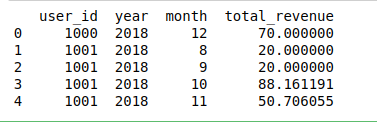
    
    
Obs.: Aqui o ideal é usar `max()` também, para evitar valores negativos na operação acima. Segue um exemplo de código para cálculo da receita.
    
```python
def calculate_rev(row):
    minutes_used = max(0, row['total_duration'] - row['minutes_included'])
    messages_used = max(0, row['total_sms'] - row['messages_included'])
    internet_used = max(0, (row['..']) - row['..']) 

    # Calcular o custo excedente 
    extra_minutes_cost = minutes_used * row['..']
    extra_messages_cost = messages_used * row['..']
    extra_internet_cost = internet_used * row['usd_per_gb'] # verifique que o valor está por `gb`
    
    # Calcular o custo Total dos extras adicionar o preço mensal do plano
    total_monthly_revenue = extra_minutes_cost + extra_messages_cost + extra_internet_cost + row['..'] # valor do plano
        
    return total_monthly_revenue
``` 
</s>
</div>

<div class="alert alert-block alert-info">
<b>
tinha faltado ter dado merge na tabela plan pra fazer assim e remover os valores 0 pra ajustar a tabela
</b> <a class="tocSkip"></a>
</div> 

## Estude o comportamento do usuário

### Chamadas

In [39]:
merged_data.groupby(['year_month' ,'plan'])['duration'].mean().unstack()

plan,surf,ultimate
year_month,,
2018-01,192.840000,183.162500
2018-02,280.851111,443.171667
2018-03,310.970000,285.701667
2018-04,332.380000,316.508095
2018-05,387.108000,383.664828
2018-06,411.450625,365.358222
2018-07,428.060917,403.767288
2018-08,394.474717,397.274789
2018-09,397.133298,413.287326


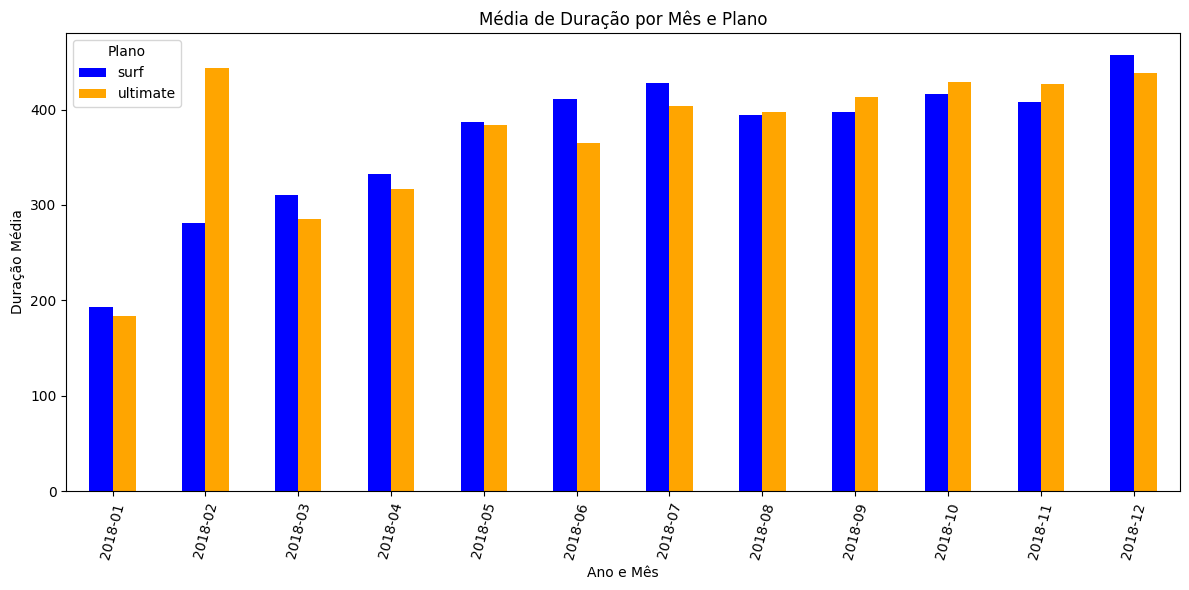

In [40]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.

x = merged_data.groupby(['year_month' ,'plan'])['duration'].mean().unstack()

x.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange'])


plt.title('Média de Duração por Mês e Plano')
plt.xlabel('Ano e Mês')
plt.ylabel('Duração Média')
plt.xticks(rotation=75)
plt.legend(title='Plano')
plt.tight_layout()

plt.show()


<Figure size 1200x600 with 0 Axes>

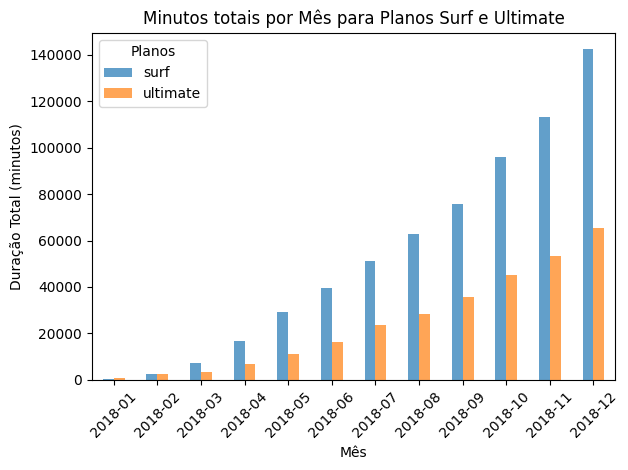

In [41]:
 #Compare o número de minutos que os usuários de cada plano necessitam a cada mês.
x = merged_data.groupby(['year_month', 'plan'])['duration'].sum().unstack()

plt.figure(figsize=(12, 6))
x.plot(kind='bar', alpha=0.7)

plt.title('Minutos totais por Mês para Planos Surf e Ultimate')
plt.xlabel('Mês')
plt.ylabel('Duração Total (minutos)')
plt.xticks(rotation=45)  
plt.legend(title='Planos')     
plt.tight_layout()  
plt.show()

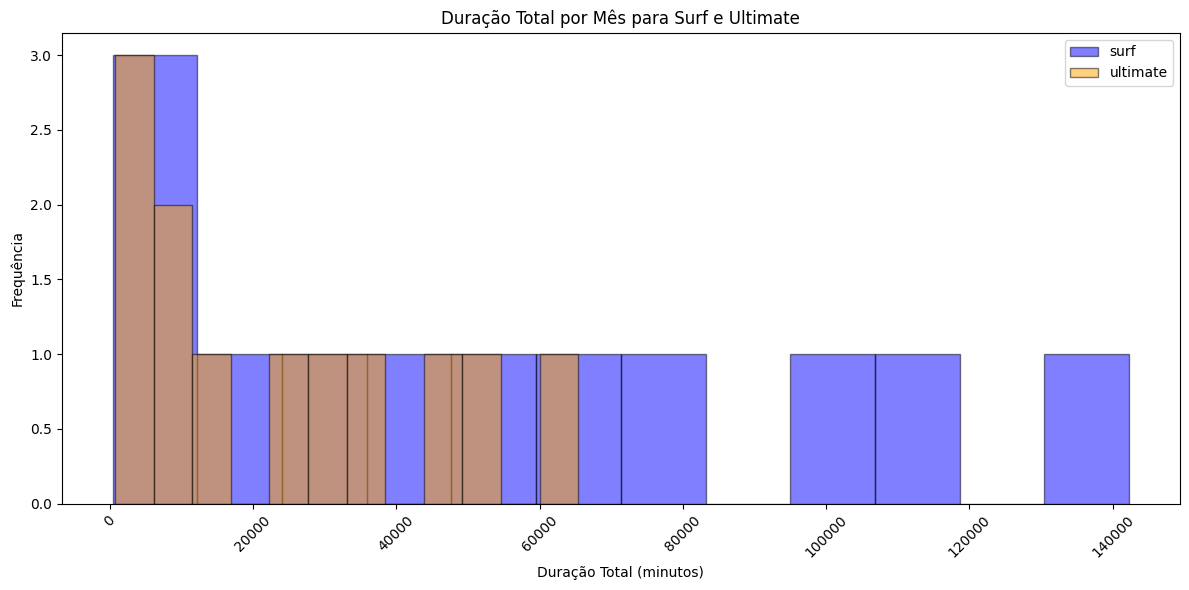

In [42]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.
x = merged_data.groupby(['year_month', 'plan'])['duration'].sum().unstack()


plt.figure(figsize=(12, 6))
plt.hist(x['surf'], bins=12, alpha=0.5, color='blue', label='surf', edgecolor='black')

plt.hist(x['ultimate'], bins=12, alpha=0.5, color='orange', label='ultimate', edgecolor='black')

plt.title('Duração Total por Mês para Surf e Ultimate')
plt.xlabel('Duração Total (minutos)')
plt.ylabel('Frequência')
plt.xticks(rotation=45) 
plt.legend()
plt.tight_layout()  
plt.show()


<div style="background-color: lightblue; color: black; padding: 10px;">
O grafico de barras ficou muito mais didatico neste caso especifico para ver o total de minutos por plano a cada mes, caso o cliente pedisse para analisar estes dados em sequencia por mes eu entregaria um grafico de barras para uma melhor visualização.    
</div>

[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [43]:
# Calcule a média e a variância da duração mensal das chamadas
media = merged_data.groupby(['year_month' ,'plan'])['duration'].mean().unstack()
print('MEDIA DE CADA PLANO' ,'\n', media)
print('\n')
vari = np.var(media)
print('VARIANCIA' ,'\n',vari)


MEDIA DE CADA PLANO 
 plan              surf    ultimate
year_month                        
2018-01     192.840000  183.162500
2018-02     280.851111  443.171667
2018-03     310.970000  285.701667
2018-04     332.380000  316.508095
2018-05     387.108000  383.664828
2018-06     411.450625  365.358222
2018-07     428.060917  403.767288
2018-08     394.474717  397.274789
2018-09     397.133298  413.287326
2018-10     416.229827  429.217238
2018-11     408.255415  427.205200
2018-12     457.547074  438.824832


VARIANCIA 
 plan
surf        5181.029808
ultimate    5460.575876
dtype: float64


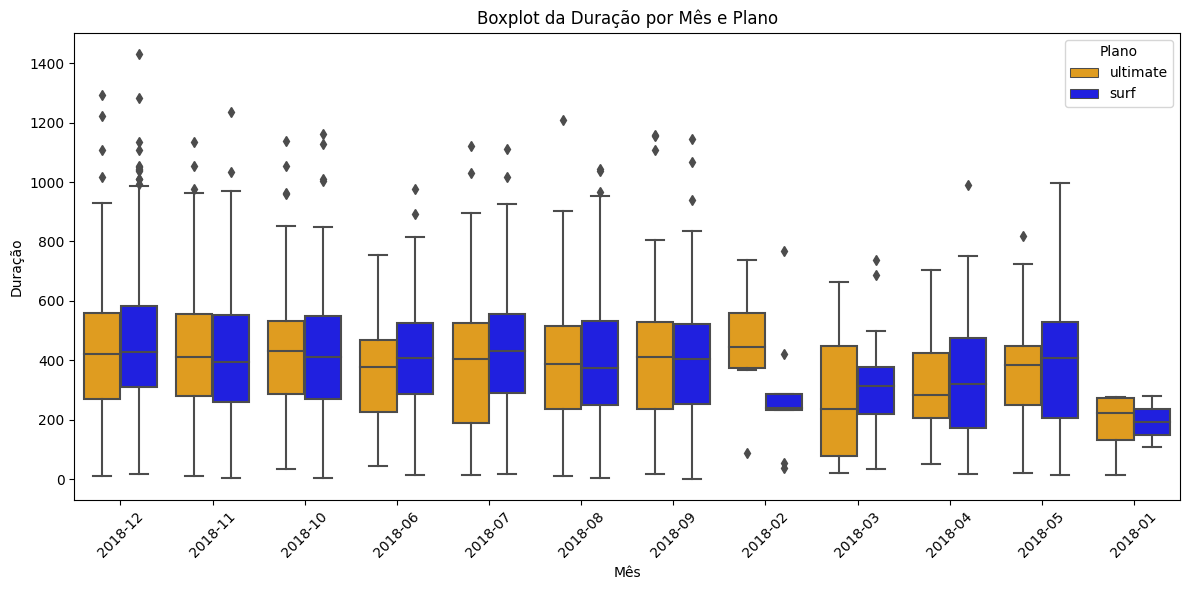

In [44]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
x = merged_data.groupby(['year_month', 'plan'])['duration'].sum().reset_index()
plt.figure(figsize=(12, 6))

palette = {'surf': 'blue', 'ultimate': 'orange'}
sns.boxplot(x='year_month', y='duration', hue='plan', data=merged_data, palette=palette)
plt.title('Boxplot da Duração por Mês e Plano')
plt.xlabel('Mês')
plt.ylabel('Duração')
plt.xticks(rotation=45)  
plt.legend(title='Plano')
plt.tight_layout()  
plt.show()

<div style="background-color: lightblue; color: black; padding: 10px;">
    
Quando comparamos os minutos totais vemos que o plano surf possui muitos minutos a mais que o ultimate, mas existem muito mais usuarios no surf do que no plano ultimate.

Para uma melhor comparação de comportamento o ideal é verificar a média ou mediana(depenendo do caso) e nessas medidas vemos que o comportamento não são tão díspares pelo gráfico de barras " Média de Duração por Mês e Plano" com exceção do segundo mês.
    
Usuarios dos dois planos usam quase a mesma quantidade de minutos, mesmo os usuarios do ultimate tendo 6 vezes mais minutos disponiveis do que os do plano surf.
    
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
    
Aqui você precisa analisar a distribuição por mês também usando boxplots. Exemplo:
    
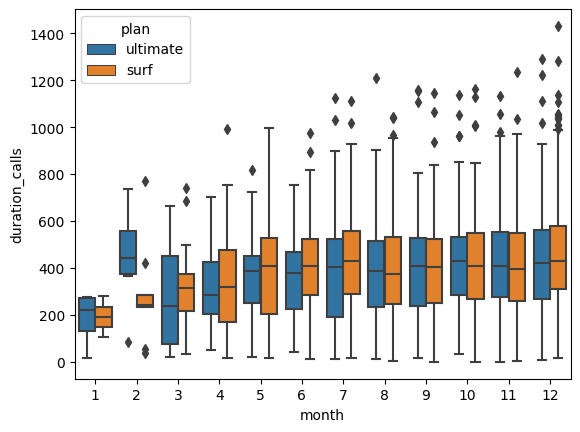
</s>
</div>

### Mensagens

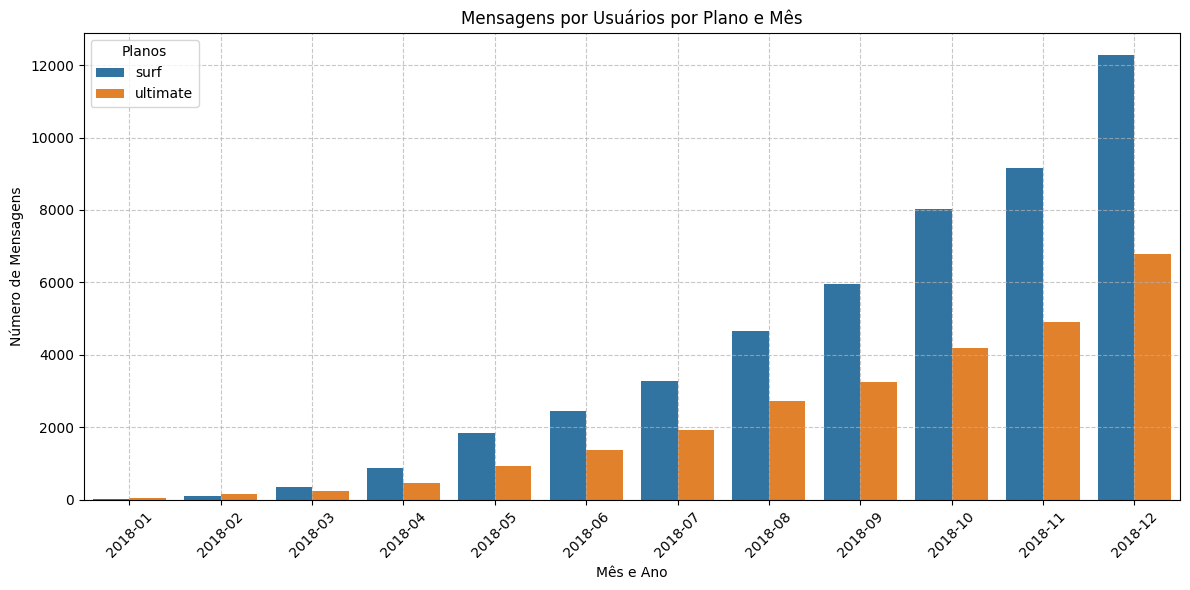

In [45]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês
x = merged_data.groupby(['year_month', 'plan'])['message_count'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=x, x='year_month', y='message_count', hue='plan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Mensagens por Usuários por Plano e Mês')
plt.ylabel('Número de Mensagens')
plt.xlabel('Mês e Ano')
plt.xticks(rotation=45) 

plt.legend(title='Planos')
plt.tight_layout()
plt.show()


In [46]:
x = merged_data.groupby(['year_month', 'plan'])['message_count'].mean().unstack()
print('MEDIA DE MENSAGENS POR PLANO E MES')
print(x)
print('\n')
print('VARIANCIA DE MENSAGENS POR PLANO')
vari = np.var(x)  
vari

MEDIA DE MENSAGENS POR PLANO E MES
plan             surf   ultimate
year_month                      
2018-01     21.000000  20.666667
2018-02     21.600000  25.166667
2018-03     21.937500  34.714286
2018-04     24.166667  28.937500
2018-05     33.017857  44.333333
2018-06     33.616438  36.289474
2018-07     35.945055  41.212766
2018-08     37.596774  47.929825
2018-09     39.523179  45.901408
2018-10     42.433862  46.977528
2018-11     40.553097  47.601942
2018-12     48.326772  53.936508


VARIANCIA DE MENSAGENS POR PLANO


plan
surf        77.242337
ultimate    97.767412
dtype: float64

<Figure size 1200x600 with 0 Axes>

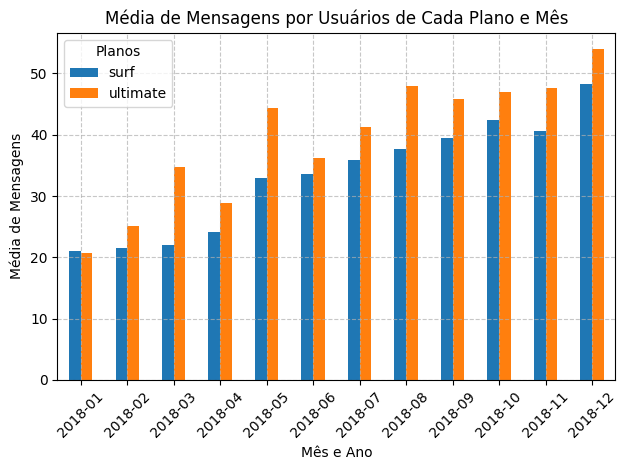

In [47]:
x = merged_data.groupby(['year_month', 'plan'])['message_count'].mean().unstack()

plt.figure(figsize=(12, 6))
x.plot(kind='bar', stacked=False)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Média de Mensagens por Usuários de Cada Plano e Mês')
plt.ylabel('Média de Mensagens')
plt.xlabel('Mês e Ano')
plt.xticks(rotation=45)  

plt.legend(title='Planos')
plt.tight_layout()
plt.show()


In [48]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano



[Formule conclusões sobre como os usuários costumam consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

### Internet

In [49]:
merged_data.head()

,user_id,year_month,gb_used,message_count,duration,plan,estado,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_revenue
0,1000.0,2018-12,1.856904,11.0,116.83,ultimate,GA MSA,1000,30.0,3000,70,7,0.01,0.01,70.000000
1,1006.0,2018-11,2.019893,15.0,9.32,ultimate,CA MSA,1000,30.0,3000,70,7,0.01,0.01,70.000000
2,1006.0,2018-12,31.366035,139.0,54.79,ultimate,CA MSA,1000,30.0,3000,70,7,0.01,0.01,79.562246
3,1008.0,2018-10,16.706045,21.0,450.21,ultimate,FL MSA,1000,30.0,3000,70,7,0.01,0.01,70.000000
4,1008.0,2018-11,23.121797,37.0,422.81,ultimate,FL MSA,1000,30.0,3000,70,7,0.01,0.01,70.000000


In [50]:
x = merged_data.groupby(['year_month','plan'])['gb_used'].sum().unstack()
x

plan,surf,ultimate
year_month,,
2018-01,9.521211,27.023799
2018-02,107.040615,117.091465
2018-03,299.751094,214.705293
2018-04,585.166162,330.619873
2018-05,1047.948564,470.810537
2018-06,1449.461260,703.986611
2018-07,1983.218428,941.738203
2018-08,2657.073906,1235.200322
2018-09,3143.298506,1425.203887


<Figure size 1200x600 with 0 Axes>

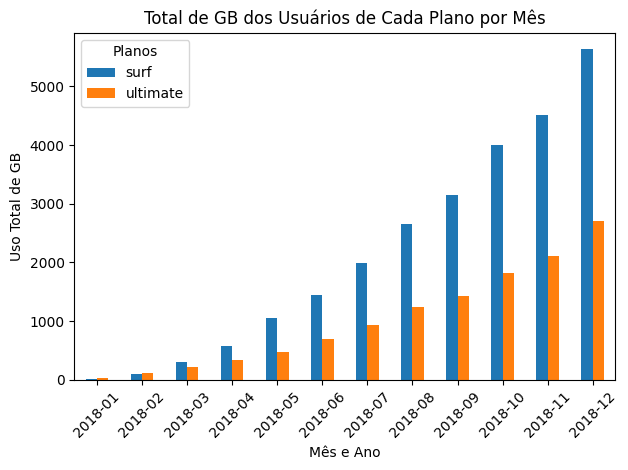

In [51]:
plt.figure(figsize=(12, 6))
x.plot(kind='bar')

plt.title('Total de GB dos Usuários de Cada Plano por Mês')
plt.ylabel('Uso Total de GB')
plt.xlabel('Mês e Ano')
plt.xticks(rotation=45)  

plt.legend(title='Planos')
plt.tight_layout()
plt.show()

In [52]:
x = merged_data.groupby(['year_month','plan'])['gb_used'].mean().unstack()
x

plan,surf,ultimate
year_month,,
2018-01,4.760605,6.755950
2018-02,11.893402,16.727352
2018-03,13.032656,17.892108
2018-04,11.942167,15.743803
2018-05,13.788797,16.234846
2018-06,15.257487,14.978439
2018-07,16.526820,15.961664
2018-08,16.711157,17.397188
2018-09,16.286521,16.572138


<Figure size 1200x600 with 0 Axes>

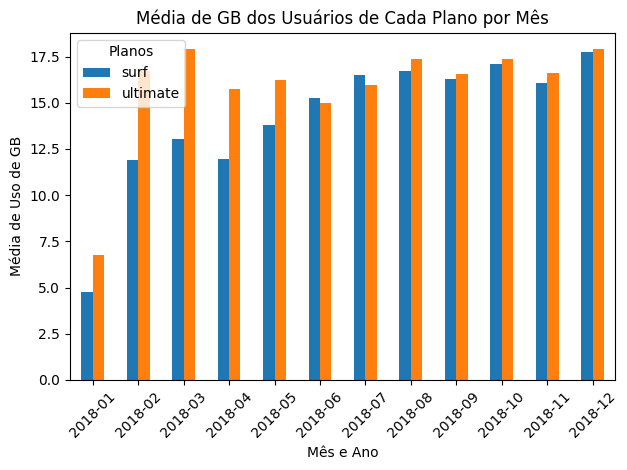

In [53]:
x = merged_data.groupby(['year_month','plan'])['gb_used'].mean().unstack()
plt.figure(figsize=(12, 6))
x.plot(kind='bar')


plt.title('Média de GB dos Usuários de Cada Plano por Mês')
plt.ylabel('Média de Uso de GB')
plt.xlabel('Mês e Ano')
plt.xticks(rotation=45)  

plt.legend(title='Planos')
plt.tight_layout()
plt.show()

<div style="background-color: lightblue; color: black; padding: 10px;">
    
Temos medias de GB usados muito parecidos, talvez vale a pena fazer uma propaganda direcionada para os usuarios do plano surf darem um upgrade ja que estão consumindo mais do que seu limite.
    
</div>

## Receita

In [54]:
x = merged_data.groupby(['year_month', 'plan'])['total_revenue'].sum().unstack()
print('SOMA TOTAL DA RECEITA POR PLANO E MES')
x

SOMA TOTAL DA RECEITA POR PLANO E MES


plan,surf,ultimate
year_month,,
2018-01,40.000000,280.000000
2018-02,297.035600,490.000000
2018-03,1002.312133,880.709375
2018-04,1938.874258,1528.198916
2018-05,3491.678287,2044.955869
2018-06,4454.303370,3359.418057
2018-07,7159.723945,4239.174434
2018-08,9825.320625,5160.287275
2018-09,10655.194925,6175.858623


In [55]:
print('RECEITA TOTAL ANUALIZADO')
merged_data.groupby( 'plan')['total_revenue'].sum()

RECEITA TOTAL ANUALIZADO


plan
surf        90123.122338
ultimate    51923.577344
Name: total_revenue, dtype: float64

<Figure size 1400x700 with 0 Axes>

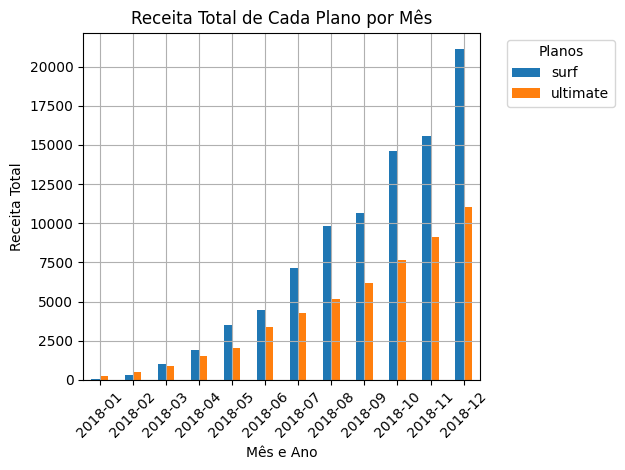

In [56]:
plt.figure(figsize=(14, 7))
x.plot(kind='bar', grid=True)


plt.title('Receita Total de Cada Plano por Mês')
plt.ylabel('Receita Total')
plt.xlabel('Mês e Ano')
plt.xticks(rotation=45)  


plt.legend(title='Planos', bbox_to_anchor=(1.05, 1), loc='upper left') 

plt.tight_layout()
plt.show()

In [57]:
media_receita = merged_data.groupby(['year_month', 'plan'])['total_revenue'].mean().reset_index()


<Figure size 1200x600 with 0 Axes>

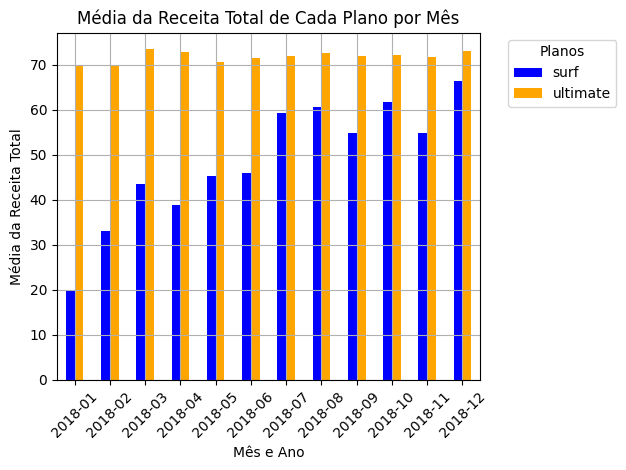

In [58]:
receita_media = merged_data.groupby(['year_month', 'plan'])['total_revenue'].mean().unstack()
plt.figure(figsize=(12, 6))
cores = ['blue', 'orange']
receita_media.plot(kind='bar', grid=True , color = cores)

plt.title('Média da Receita Total de Cada Plano por Mês')
plt.ylabel('Média da Receita Total')
plt.xlabel('Mês e Ano')
plt.xticks(rotation=45)  

plt.legend(title='Planos', bbox_to_anchor=(1.05, 1), loc='upper left')  

plt.tight_layout()
plt.show()

<div style="background-color: lightblue; color: black; padding: 10px;">
    
Pelos graficos das receitas vemos que o plano ultimate tem sido mais rentável para a companhia até o presente momento mesmo o numero de usuarios do plano surf sendo mais de 2 vezes o do plano ultimate.
    
A receita do plano surf vem aumentando em comparaçao aos usuarios do ultimate, caso esta tendencia se mantenha o plano surf deverá ultrapassar o plano ultimate em receita no proximo ano.
     

    
</div>

## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Considere declarar as hipóteses nula e alternativa diretamente no texto.
</div>

In [59]:
# Teste as hipóteses
#h0 = media_receita_surf == media_receita_ultimate
#h1 = media_receita_surf != media_receita_ultimate
alpha = 0.05
m1 = media_receita[media_receita['plan']=='surf']['total_revenue'].reset_index(drop=True)
m2 = media_receita[media_receita['plan']=='ultimate']['total_revenue'].reset_index(drop=True)

teste1 = st.ttest_rel(m1 , m2)

print('p.value:' , teste1.pvalue)
if teste1.pvalue < alpha:
    print("Rejeitamos a hipótese nula onde media_receita_surf = media_receita_ultimate")
else:
    print("Não podemos rejeitar a hipótese nula onde media_receita_surf = media_receita_ultimate")

p.value: 6.759125050854976e-05
Rejeitamos a hipótese nula onde media_receita_surf = media_receita_ultimate


[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Aqui não é necessário fazer o `merge` dos dados novamente, pois essa etapa já foi realizada na primeira parte do estudo.</s>
</div>

<div class="alert alert-block alert-info">
<b>
    
Esse foi o mesmo caso do 'enriqueça os dados' eu fui fazendo conforme fui precisando, e fui deixando os codigos perto ou dentro  das celulas que precisei.
    
</b> <a class="tocSkip"></a>
</div>

In [60]:
nynj = merged_data[merged_data['estado']== 'NY-NJ-PA MSA']
rest = merged_data[~(merged_data['estado']== 'NY-NJ-PA MSA')]

m11 =nynj.groupby('year_month')['total_revenue'].mean()
m22 =rest.groupby('year_month')['total_revenue'].mean()

In [61]:
# Teste as hipóteses
#h0 = nynj == rest
#h1 = nynj != rest
alpha = .05
teste2 = st.ttest_ind(m11,m22 , equal_var=False)
print('valor p:', teste2.pvalue)
if teste2.pvalue < alpha:
    print('Rejeitamos a hipotese nula (nynj == rest)')
else:
    print('Nao podemos rejeitar a hipotese nula(nynj == rest)')
    

valor p: 0.043346165359584014
Rejeitamos a hipotese nula (nynj == rest)


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
    
Aqui você precisa executar o teste-t independente:
    
```python
st.ttest_ind(sample_1, sample_2, equal_var=#True ou False)
...
```
</s>
</div>

## Conclusão geral



<div class="alert alert-block alert-info">
<b>

Vimos que a receita do plano surf vem aumentando em uma escala rapida, mas no comparativo anual temos o plano ultimate superando o plano surf ainda neste ultimo ano
    
Caso a tendencia continue desta forma a media de receita do plano surf poderá ultrapassar a do ultimate ou quando essa media ficar parelha com a do ultimate a empresa pode oferecer um upgrade de conta afim de fidelizar os usuários e ter receitas mais estáveis.
    
E como solução do problema de negocio inicial, o plano surf tem atraido mais clientes para a empresa e vem aumentando a sua receita média de forma rapida, então se tivermos que escolher um plano para otimizar nosso orçamento de marketing seria para o plano surf.
</b> <a class="tocSkip"></a>
</div>    
